## Stochastic gene expression using Gillespie algorithm

>_"Life is a study in contrasts between **randomness** and **determinism**: from the chaos of biomolecular interactions to the precise coordination of development, living organisms are able to resolve these two seemingly contradictory aspects of their internal workings."_
>
>[Raj & van Oudenaarden, 2008](https://www.sciencedirect.com/science/article/pii/S0092867408012439?via%3Dihub)

<img src="https://www.insidescience.org/sites/default/files/2020-06/machine-rng.jpg"/>

### Table of Contents

* [Part I:](#partI)
    * [Brownian motion as paradigm of stochastic processes](#section_1_1)
    * [Let's simulate it](#section_1_2)
    * [Everything is stochastic, but what are the stochastic events that really matter?](#section_1_3)

* [Part II:](#chapter2)
    * [Section 2.1](#section_2_1)
    * [Section 2.2](#section_2_2)

## Part I <a class="anchor" id="partI"></a>

#### Brownian motion as paradigm of stochastic processes <a class="anchor" id="section_1_1"></a>

The discovery of [**Brownian motion**](https://en.wikipedia.org/wiki/Brownian_motion) predates the development of **statistical mechanics** and provided important insight to physicists of the early twentieth century in their first formulations of an atomic description of matter.

<img src="Figures/Brownianmotion.gif" style="width: 300px;float: right;" />


Brownian motion was discovered somewhat _serendipitously_ in **1828** by botanist **Robert Brown** while he was studying pollen under a microscope. Though many others before him had observed the jittery, random motion of fine particles in a fluid, Brown was the first to catalogue his observations and use them to test hypotheses about the nature of the motion.

The first theoretical explanation of the Brownian motion was given by **A. Einstein** in **1905** who had the idea to look at the problem from a probabilistic point of view by discarding all the microscopic details. 

He interpreted the Brownian motion as coming from the motion of a mesoscopic particle that discontinuously experiences random collisions with the (much smaller and thereby invisible) particles of the surrounding fluid.

Since then the Brownian Motion has become the _paradigm_ of a large class of [stochastic processes](https://www.sciencedirect.com/topics/agricultural-and-biological-sciences/stochastic-processes) and more generally to the statistical mechanics of non-equilibrium.

### Let's simulate it <a class="anchor" id="section_1_2"></a>

**Below** you can find a model to make a stochastic simulation of Brownian motions.

A **"for loop"** is used in order to repeat a number of time the simulation!

> 1) **Change** the number of loops (in the cell below) and observe the result of multiple simulation using the same combination of parameters.
> 
> 2) **Observe** the different plots

In [52]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # package to make plot
%matplotlib inline

from utils import plotting_tools as pt
from utils.brownian_function import brownian

print('Packages are loaded ...')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Packages are loaded ...


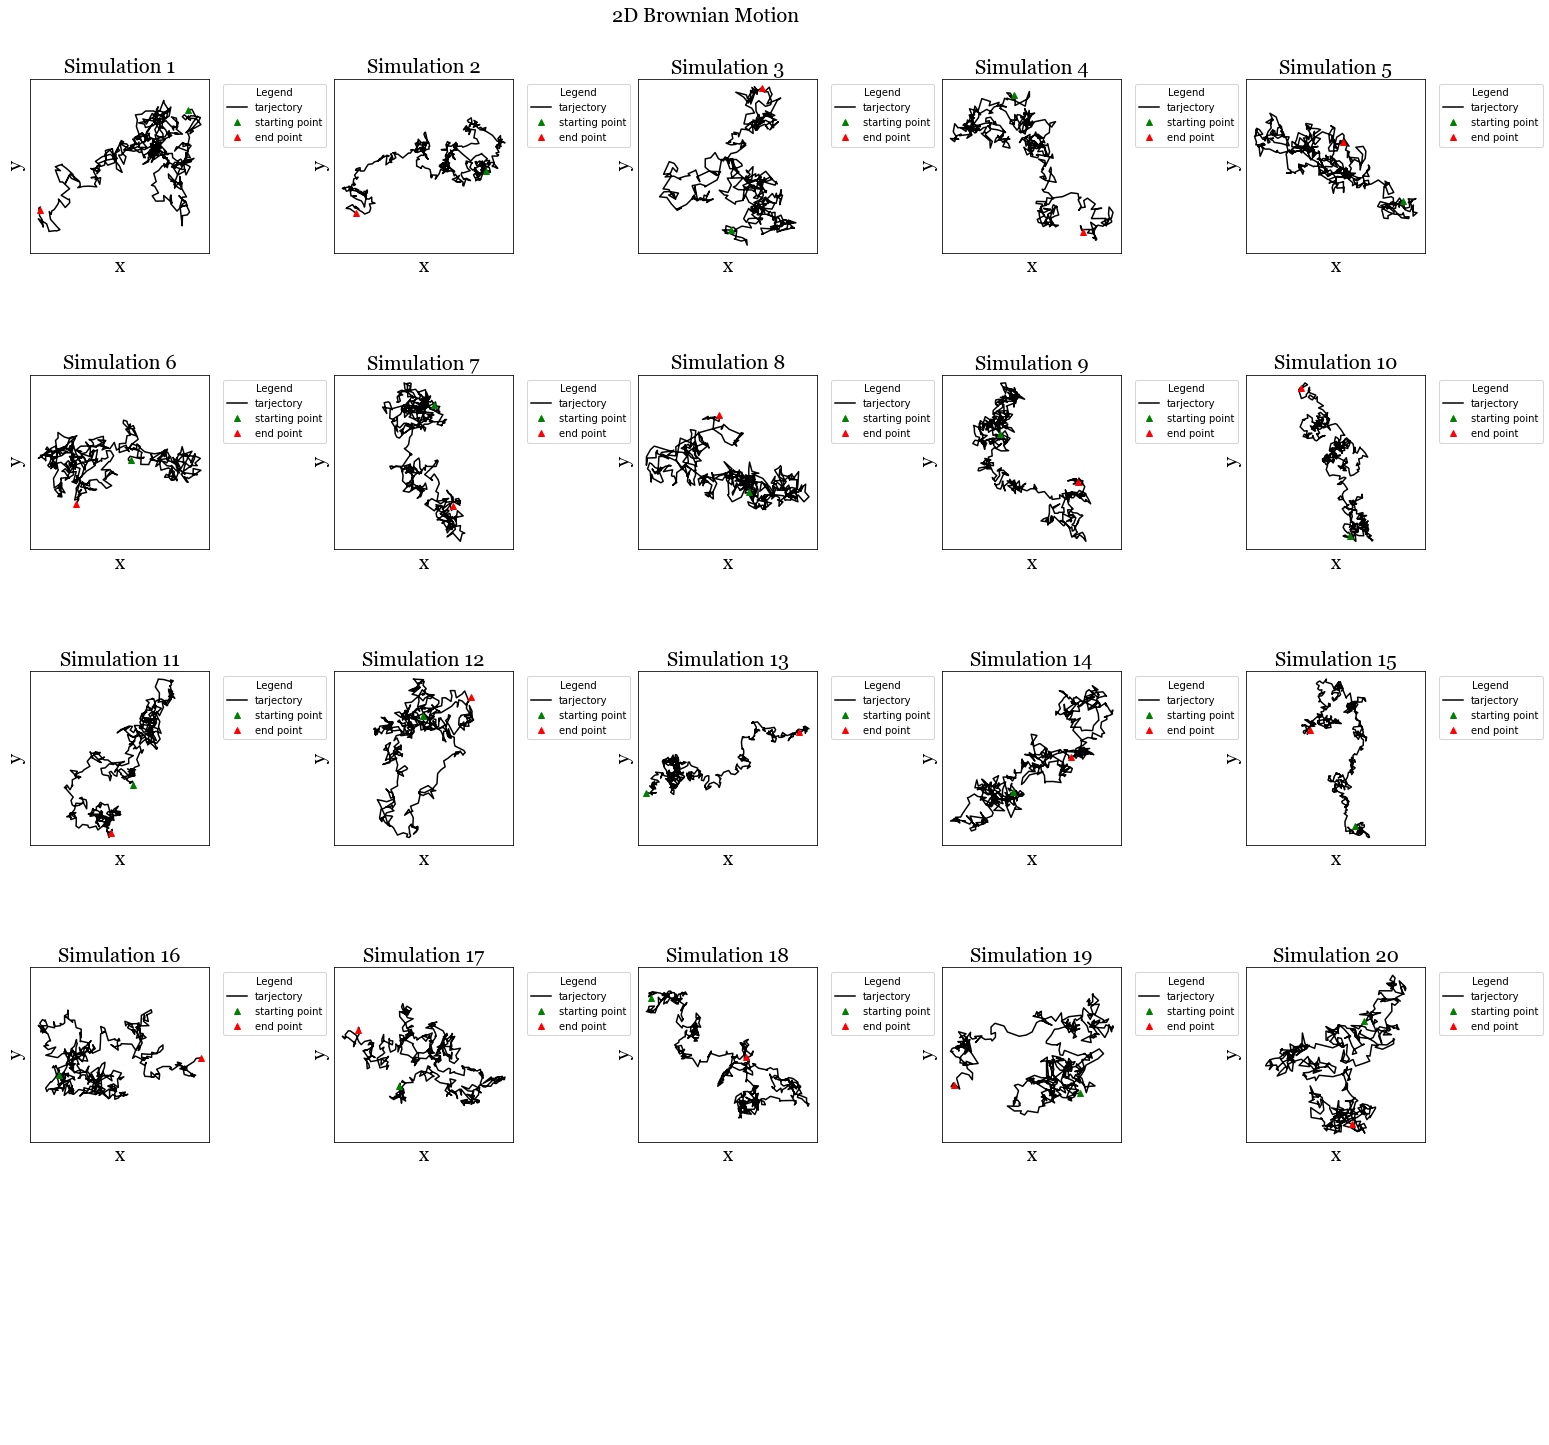

In [66]:
B_params = {
    'n_loops':20, # <--- HERE change the number of loops e.g. 2,6,10,20
    
    # The Wiener process parameter.
    'delta':0.25, #It determins the speed of th process
    'T' : 10.0, # Total time.
    'N' : 500, # Number of steps
}

B_params['dt'] = B_params['T'] / B_params['N'] # Time step size
B_params['x'] =  np.empty((2,B_params['N']+1)) # Initial values of x.
B_params['x'][:, 0] = 0.0  

pt.plot_loop_subplot(x=B_params['x'], b_params=B_params, 
                     savein="Brownian_motion_black.png")

> Could you **reproduce** the same result (plot) at least twice?
#### This brings up the question ... how does stochastic simulation work?
#### What is the **magic** in it?


> --> At the core of every stochastic simulation there is a [**random number generator**](https://en.wikipedia.org/wiki/Random_number_generation).

<img src="Figures/dilbert.jpg"/>

> 3. **Run** the cell below more than 1 time ( **shift+enter**). 
>In each "for loop" the function **np.random.randint()** draws a new (pseudo)random number between 1 & 1000

In [31]:
n_loops = 10
for i in range(n_loops): 
    
    # Generated random number will be between 1 to 1000.
    print(np.random.randint(1, 1000))  

475
3
207
772
97
217
425
274
102
302


> 4. In the cell below paste the same code of the previous cell.
>
>    Add INSIDE the loop (remember to indent with using the **tab** key) the following line:
     **np.random.seed(42)** 

This will allow you to fix the seed of the random number generator and therefore to **reproduce** the same random number!
*********
This is very important if you want to make your stochastic simulation <span a style="color:blue">reproducible</span>, which is useful if not essential when checking whether your code does what you want it to do. 
 

In [32]:
# HERE paste the code 








Every molecular event in the cell is the result of **random** encounters between molecules, 
some of which are present in **small numbers**, therefore the biochemical processes that regulate transcription initiation are inherently **stochastic**".

Before the **single cell era**, classic molecular biology have considered just **average measuremnts (_aka bulk_)**.

Average & population (probabilistic) behavior **can be modelled**, respectively with:
#### <span a style="color:blue">**Deterministic** </span> vs <span a style="color:green">**Stochastic** </span> mathematical models. 
The following are the main difference between the two.


><span a style="color:blue">**Odinary differential equations (ODEs)** </span>
>
><span a style="color:green">**Master equation** </span>
> *****
><span a style="color:blue">**Odinary differential equations (ODEs)** </span>
>
><span a style="color:green">**Gillespie Algorithm** </span>
> *****
><span a style="color:blue">**Concentration of molecules** </span>
>
><span a style="color:green">**Number of molecules** </span>
> *****
><span a style="color:blue">**Future is predictable given present knowledge** </span>
>
><span a style="color:green">**Includes randomness: Every simulation is different** </span>
> *****
><span a style="color:blue">**Good for a large number of molecules; qualitative analysis** </span>
>
><span a style="color:green">**Better for simulating dynamics with small numbers of molecules** </span>
> *****
><span a style="color:blue">**Represents** population **average** </span>
>
><span a style="color:green">**Through a large number of simulations, average and variability can both be assessed** </span>

### This brings therefore to deal with **distributions** instead of single values.

The <span style="color:blueviolet">**shape** </span> of any distribution can be described by its various ‘moments’. The first four are:

>1) The **mean**, which indicates the central tendency of a distribution.
>
>2) The second moment is the **variance**, which indicates the width and equals the square of the ‘standard deviation’.
>
>3) The third moment is the **skewness**, which indicates any asymmetric ‘leaning’ to either left or right.
>
>4) The fourth moment is the **Kurtosis**, which indicates the ‘fatness’ of the outer tails.

<span style="color:blueviolet">**How we can quantify the variability from a distribution!?** </span>

One way to measure the dispersion of a probability distribution is the **Fano factor:**

$$ F = \frac{\sigma^2}{\mu} $$




###  Let's calculate some of these **moments** of a known theoretical distribution: [Poisson](https://en.wikipedia.org/wiki/Poisson_distribution) 

<span style="color:blueviolet">**np.random.poisson( )** </span> is a function that enables you to sample **random** numbers in accordance with a Poisson distribution. 
- <span style="color:blueviolet">**use** </span> 3 lambdas, to produce 3 "datasets" (if lam=10 the distribution will have average 10)
- <span style="color:blueviolet">**calculate**</span> **mean**, **variance** using <span style="color:blueviolet">**np( )**</span> function and **Fano** doing the formula, **print** the result! (see below the example)

In [34]:
N_Cells = 10000 

Poisson_Dataset_1 = np.random.poisson(lam= 10.0, size= N_Cells)
Poisson_Dataset_2 = np.random.poisson(lam= 100.0, size= N_Cells)
Poisson_Dataset_3 = np.random.poisson(lam= 1000.0, size= N_Cells)

In [35]:
Distr_dict = {'Dataset 1':Poisson_Dataset_1,
              'Dataset 2':Poisson_Dataset_2,
              'Dataset 3':Poisson_Dataset_3}

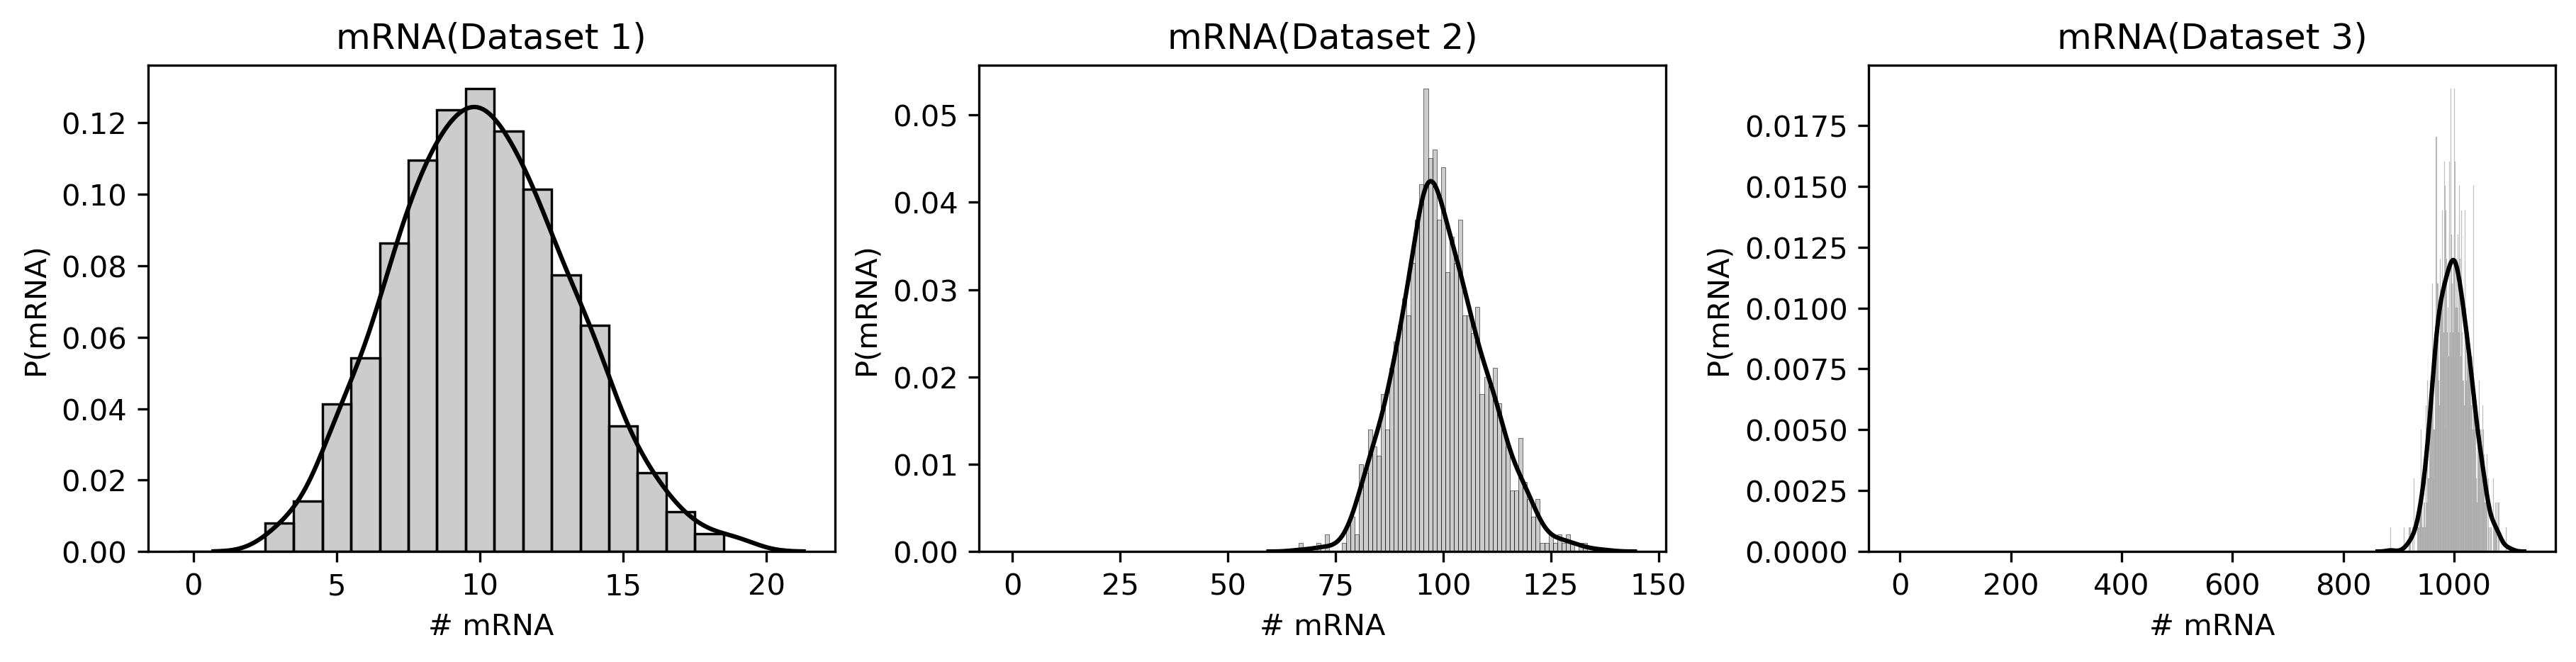

In [36]:
fig, axs = plt.subplots(1, 3,figsize=(12,3),constrained_layout=True, dpi=300)
axs = axs.ravel()

for ix, (k, v) in enumerate(Distr_dict.items()):
    
    sns.kdeplot( v, color = 'black', ax = axs[ix]);
    sns.histplot(v, color = 'black', stat='probability', bins = pt.hist_bins(v), alpha = 0.2, ax = axs[ix])

    axs[ix].set_title('mRNA'+'(' + k + ')',fontsize=12);
    axs[ix].set_ylabel("P(mRNA)"), axs[ix].set_xlabel("# mRNA");

In [72]:
mean1 = np.mean(Poisson_Dataset_1).round()
mean2 = np.mean(Poisson_Dataset_2).round()
mean3 = np.mean(Poisson_Dataset_3).round()
print('Mean 1:{}'.format(mean1))

Mean 1:10.0


In [38]:
var1 = np.var(Poisson_Dataset_1).round()
var2 = 1
var3 = 1

In [73]:
# See the formula above and compute and print the Fano factor
fano1 = 1
fano2 = 1
fano3 = 1

#### Let's make a table with your results.

In [40]:
table = pd.DataFrame({'Mean'    : [mean1,mean2,mean3],
                      'Fano'    : [fano1, fano2, fano3],
                      'Variance': [var1, var2,var3]})

display(table)

,Mean,Fano,Variance
0,10.0,1,9.0
1,2.0,1,1.0
2,3.0,1,1.0


> 1. Does the mean correspond with the **lambda** that you predefined?
> 2. Does the Fano factor change with the mean?

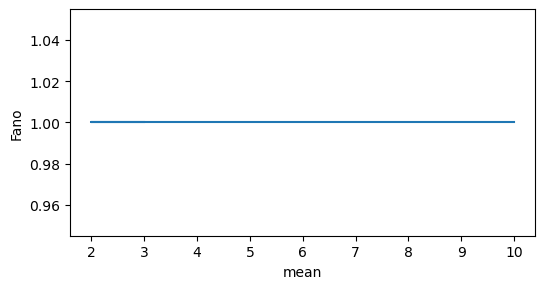

In [41]:
x = table['Mean']
y = table['Fano']

plt.figure(figsize=(6,3),dpi=100)
plt.plot(x,y,'-')
plt.xlabel('mean')
plt.ylabel('Fano');

### Things you should remember of the Poisson Distribution.

>1. Poisson distribution is represent the **_minimal thermodynamic noise_** of a molecular system.
>
>2. Its mean and variance are identical, therefore **Fano factor is 1**.
>
>3. When the fluctuation around the average value is Poisson or very small the Deterministic prediction is a good approximation of the average of the stochastic.
>
>4. When the averages are really low the relative fluctuation can be gigantic, even for Poisson
(0.01 mRNA per cell) 
> 
> --> calculate the standard deviation (using **np.std()**) in the cell below

<img src="Figures/FanoFactor_Distributions.png"  style="width: 200px;float: right;"/>

### Everything is stochastic, but what are the stochastic events that really matter? <a class="anchor" id="section_1_3"></a>

Genetically identical cells (**isogenic population**) in an identical environment behave differently, leading to significant consequences in many biological process from bacterial bet-hadging to mammalian decision-making and development.

Every molecular event in the cell is the result of **random** encounters between molecules, 
some of which are present in **small numbers**, therefore all biochemical processes also the one that regulate transcription initiation are inherently **highly stochastic**.

A well-known potential source of this cell-to-cell variability is a noisy messenger RNA production (at numbers higher than 1 per event), which is the so-called **‘transcription bursting’**, and this mechanism has been widely studied by theoretical and experimental approaches. 

Transcriptional bursting can be explained by a **two-state model** of gene regulation, where a gene switches between on and off states.


###  To better appriciate the added value of stochastic simulations 
#### We will a simulate **minimal model** for bursty trasncription in both a <span style="color:red">**deterministic** </span> & a <span style="color:red">**stochastic** </span> mathematical model.
<img src="Figures/minimal_burst_model.png" alt="Drawing" style="width: 500px;"/> 

> 
**This model has just 3 parameters!** 
> 

## Let us start with a <span style="color:red">deterministic </span> model.
<img src="Figures/average_mRNA.png" alt="Drawing" style="width: 400px;"/> 

<span style="color:blueviolet">**Solve** </span> the equation above and <span style="color:blueviolet">**calculate analytically** </span> the **average** number of mRNA at steady state for the following cases:
  1) k_burst = 50,k_deg = 1, burst_size = 1
  2) k_burst = 50,k_deg = 1, burst_size = 1
  3) k_burst = 50,k_deg = 1, burst_size = 1

In [74]:
1 * 10 * 10

100

In [42]:
## Calculate and print!

aver_1 =  42 # here you calculate e.g. (100*1)/0.1
aver_2 =  42 # here you calculate
aver_3 =  42 # here you calculate

aver_list = [aver_1,aver_2,aver_3]

for i,a in enumerate(aver_list):
    print('average {}: {}'.format(i+1,a))

average 1: 42
average 2: 42
average 3: 42


### Now for the same set of parameters: 

We will <span style="color:blueviolet">**calculate numerically** </span> the **average** number of mRNA at steady state for the following cases:


  
><span style="color:blueviolet">**ODE_Plot( )** </span> is a function that contains **odeint()** which **integrates** a system of ordinary differential equations and then plots the results.
- <span style="color:blueviolet">**change** </span> the **parameters** in the following command cell;
- <span style="color:blueviolet">****check**** </span> if the **analystical solution** agrees with the **numerical** one!

In [76]:
Dataset_1 = {'k_burst': 50,
             'k_deg'  : 1,
             'burst_size' : 1}
Dataset_2 = {'k_burst': 10,
             'k_deg'  : 0.1,
             'burst_size' : 1}
Dataset_3 = {'k_burst': 4,
             'k_deg'  : 1,
             'burst_size' : 50}

Datasets_param = {'Dataset_1':Dataset_1,
                  'Dataset_2':Dataset_2,
                  'Dataset_3':Dataset_3}

Datasets_param

{'Dataset_1': {'k_burst': 50, 'k_deg': 1, 'burst_size': 1},
 'Dataset_2': {'k_burst': 10, 'k_deg': 0.1, 'burst_size': 1},
 'Dataset_3': {'k_burst': 4, 'k_deg': 1, 'burst_size': 50}}

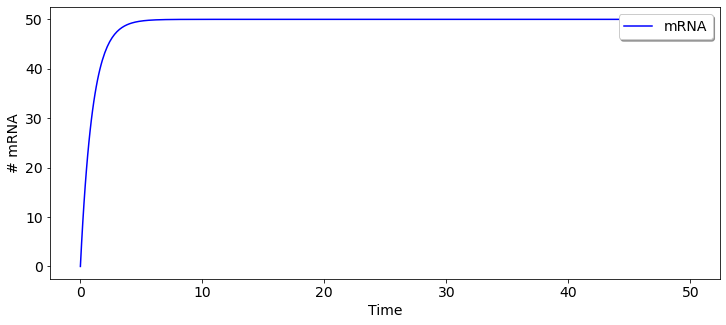

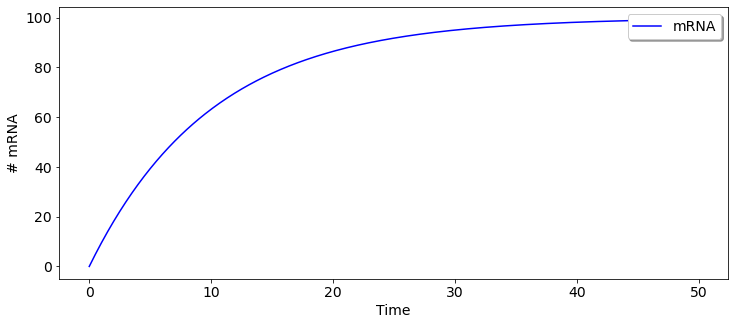

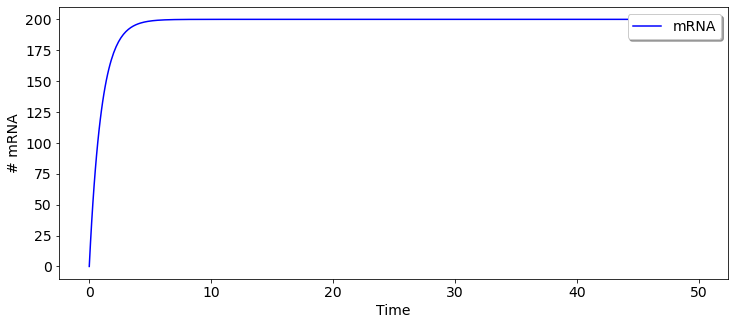

In [47]:
for param in Datasets_param.keys():
    
    k_burst    = Datasets_param[param]['k_burst']
    burst_size = Datasets_param[param]['k_deg']
    k_deg      = Datasets_param[param]['burst_size']
      
    pt.ODE_Plot(k_burst,burst_size,k_deg)

## And now the <span style="color:red">stochastic </span> counterpart.

#### To do this we need to implement the [Gillespie algorithm](https://en.wikipedia.org/wiki/Gillespie_algorithm),  which is a Stochastic Simulation Algorithm (SSA).

>It is used in probability theory to generate a statistically correct <span style="color:red">trajectory </span>  (possible solution) of a stochastic equation. It was created by Joseph L. Doob and others (circa 1945), presented by Dan Gillespie in 1976, and popularized in 1977 in a [paper](https://pubs.acs.org/doi/abs/10.1021/j100540a008) where he uses it to simulate chemical or biochemical systems of reactions efficiently and accurately using limited computational power.

<span style="color:red">!!! Skip the following reading until the next box if you are already running out of time! </span>
************

#### Canonical steps of this algorithm are the following (math omitted):
<span style="color:blueviolet">**1.Initialization:** </span> 

Initialise the number of molecules in the system, reaction constants, and random number generators.

<span style="color:blueviolet">**2. Monte Carlo step:** </span>

Generate **2 random numbers** to determine the next reaction to occur as well as the time interval. 

>The <span style="color:blueviolet">**first** </span> random number is drawn from an **uniform distribution** (between 0-1).
>
>This will allow to choose which reaction will take place in each iteration (bursting or degradation?).
>
>**NB!** The probability of the degradation reaction to occur dependes on the number of substrate molecules.
>
> (If the number of mRNA molecules is ZERO also the Probability to degrade them is ZERO!)
>
>The <span style="color:blueviolet">**second** </span> random number is drawn from an **exponential distribution** in which the parameter  **lambda** is the inverse of the SUM of the reaction propensities.
>
>The time interval is exponentially distributed.

<span style="color:blueviolet">**3. Update:** </span>

Increase the time step by the random time generated in **Step 2**. Update the molecule count based on the reaction that occurred.

<span style="color:blueviolet">**4. Iterate:** </span>

Go back to Step 2 unless the simulation time has been exceeded.

In [48]:
from utils.gillespie_time_average_function import *

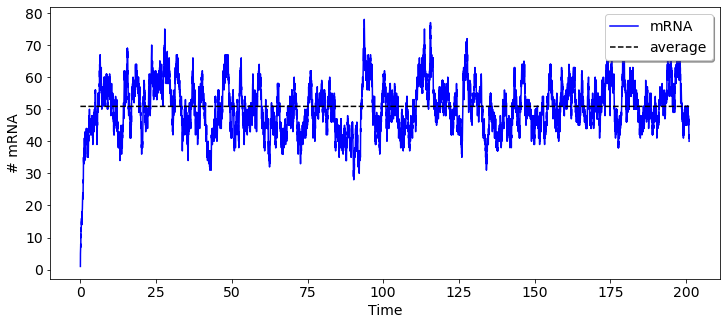

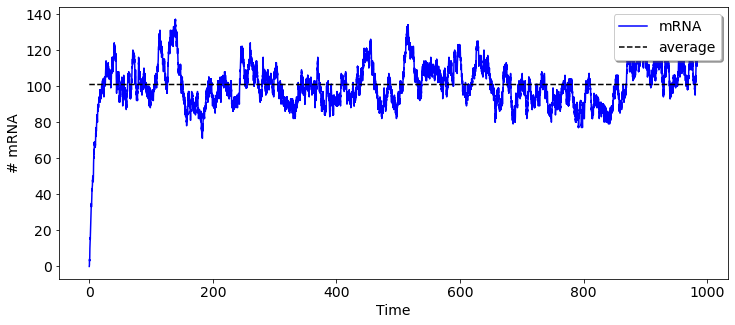

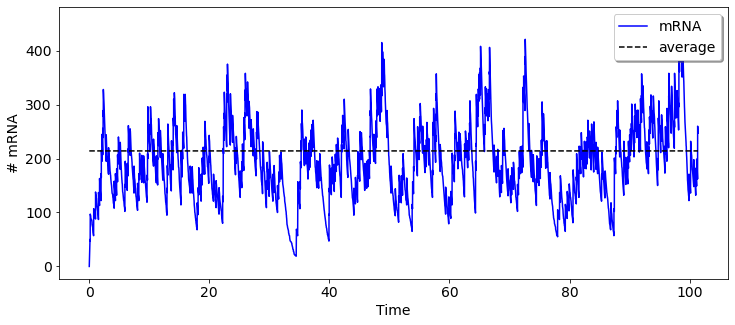

In [51]:
# the output of this function are 2 lists: time_steps(time points) &  mRNA_trajectory (mRNA content for each of them)
Distr_dict= {}

for param in Datasets_param.keys():
    
    time_steps, mRNA_trajectory = gillespie_time_average(N_RUNS = 20000,
                                                         k_burst = Datasets_param[param]['k_burst'], 
                                                         k_deg   = Datasets_param[param]['k_deg'], 
                                                         burst_size = Datasets_param[param]['burst_size']) 
    Distr_dict[param] = mRNA_trajectory[100:]
    pt.Stoch_Plot(time_steps, mRNA_trajectory)

#### For a normal Burst size of 50, the variation is enormous.

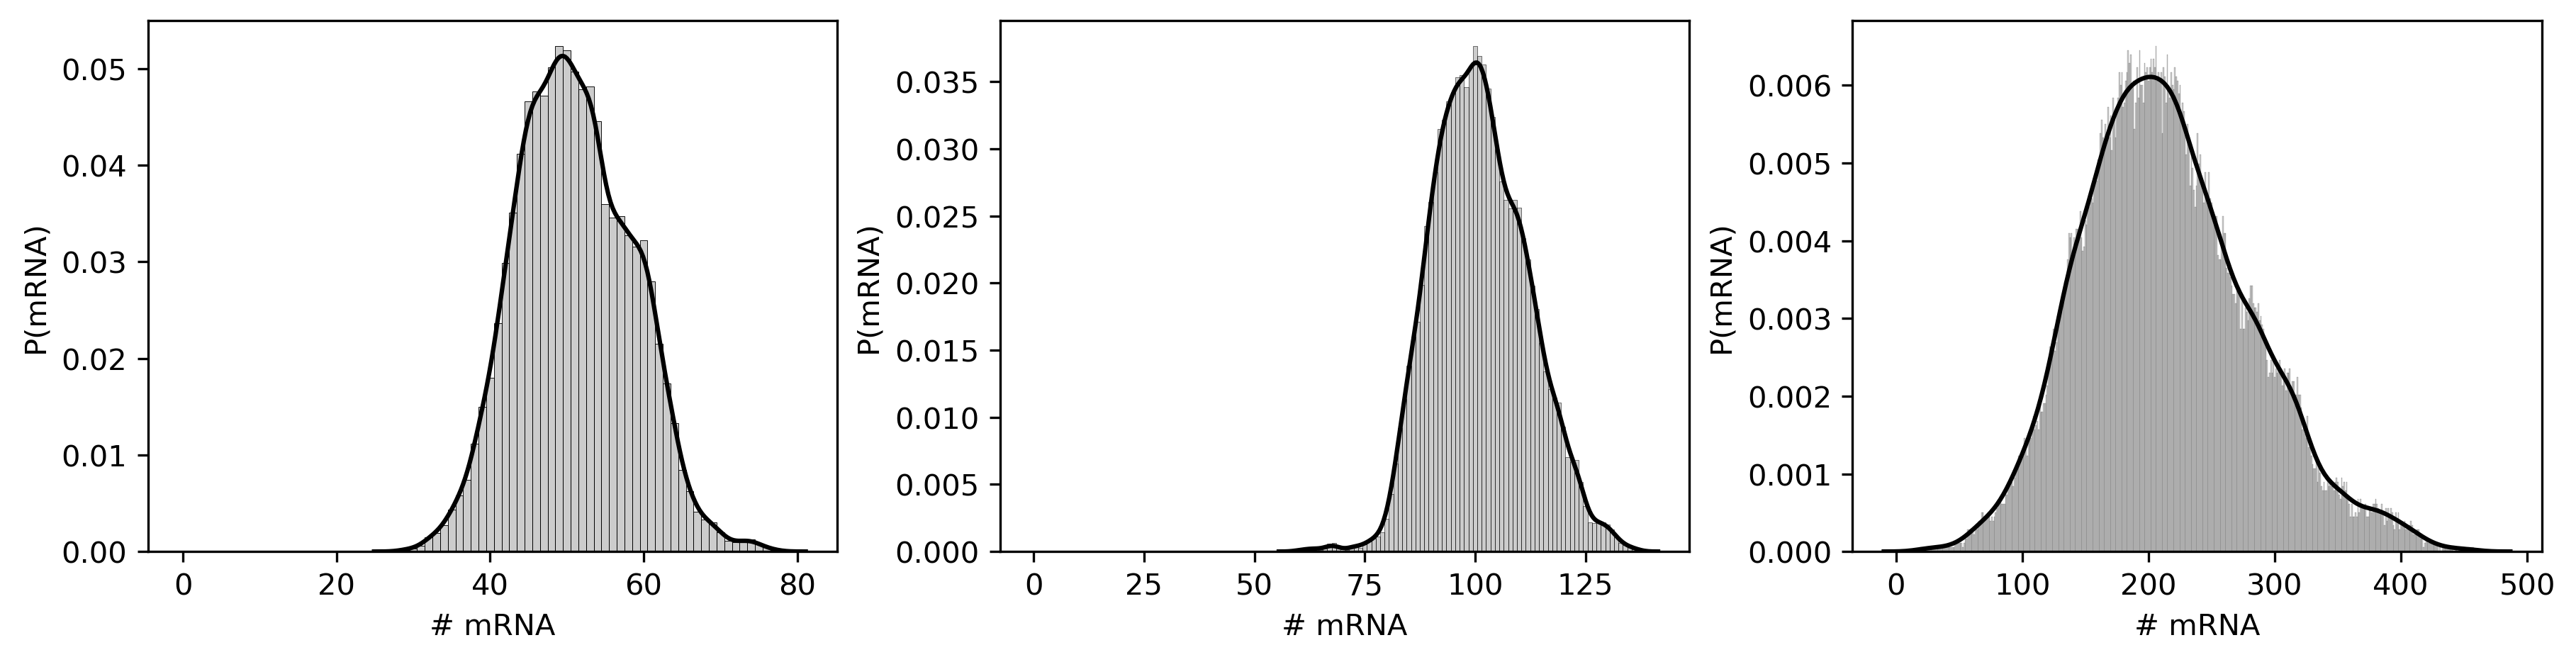

In [78]:
fig, axs = plt.subplots(1, 3,figsize=(12,3),constrained_layout=True, dpi=300)
axs = axs.ravel()

for ix, (k, v) in enumerate(Distr_dict.items()):
    
    sns.kdeplot( v, color = 'black', ax = axs[ix]);
    sns.histplot(v, color = 'black', stat='probability', bins = pt.hist_bins(v), alpha = 0.2, ax = axs[ix])

    axs[ix].title(['mRNA'+'(' + k + ')']);
    axs[ix].set_ylabel("P(mRNA)"), axs[ix].set_xlabel("# mRNA");
    



### Take Home Message
<img src="Figures/Home_message.png" style="width: 100px;"/> 

>1. Many of TFs have low copy number.
>


>2. Many relevant mRNAs variation: the exception rules.
>
>3. It's not difficult to model this